In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import os

In [3]:
html_tables = {}

# Testing on how to read the files.

In [4]:
os.listdir('datasets')

['fb_05ene.html',
 'fb_22sep.html',
 'tsla_05ene.html',
 'tsla_22sep.html',
 'tsla_26nov.html']

In [5]:
for table_name in os.listdir('datasets'):
    table_path = f'datasets/{table_name}'
    print(table_path)

datasets/fb_05ene.html
datasets/fb_22sep.html
datasets/tsla_05ene.html
datasets/tsla_22sep.html
datasets/tsla_26nov.html


In [6]:
table_file = open('datasets/fb_05ene.html','r')

In [7]:
table_file

<_io.TextIOWrapper name='datasets/fb_05ene.html' mode='r' encoding='cp1252'>

In [8]:
html = BeautifulSoup(table_file)

In [9]:
#html

In [10]:
html_table = html.find(id = "news-table")

In [11]:
html_table

<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Jan-04-19 06:22PM  </td><td align="left"><a class="tab-link-news" href="https://www.thestreet.com/technology/faang-stocks-14825211?puc=yahoo&amp;cm_ven=YAHOO&amp;yptr=yahoo" target="_blank">Facebook, Apple, Netflix, Amazon and Alphabet Power Friday Gains</a> <span style="color:#aa6dc0;font-size:9px">TheStreet.com</span></td></tr>
<tr><td align="right" width="130">05:15PM  </td><td align="left"><a class="tab-link-news" href="https://finance.yahoo.com/news/earnings-calendar-week-dec-11-192003013.html" target="_blank">Earnings Reports for the Week of Jan. 7-11 (BBBY, KBH)</a> <span style="color:#aa6dc0;font-size:9px">Kiplinger</span></td></tr>
<tr><td align="right" width="130">04:55PM  </td><td align="left"><a class="tab-link-news" href="https://finance.yahoo.com/news/column-commentary-2019-more-state-215519079.html" targe

In [12]:
html_tables["fb_05ene.html"] = html_table

In [13]:
html_tables

{'fb_05ene.html': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
 <tr><td align="right" style="white-space:nowrap" width="130">Jan-04-19 06:22PM  </td><td align="left"><a class="tab-link-news" href="https://www.thestreet.com/technology/faang-stocks-14825211?puc=yahoo&amp;cm_ven=YAHOO&amp;yptr=yahoo" target="_blank">Facebook, Apple, Netflix, Amazon and Alphabet Power Friday Gains</a> <span style="color:#aa6dc0;font-size:9px">TheStreet.com</span></td></tr>
 <tr><td align="right" width="130">05:15PM  </td><td align="left"><a class="tab-link-news" href="https://finance.yahoo.com/news/earnings-calendar-week-dec-11-192003013.html" target="_blank">Earnings Reports for the Week of Jan. 7-11 (BBBY, KBH)</a> <span style="color:#aa6dc0;font-size:9px">Kiplinger</span></td></tr>
 <tr><td align="right" width="130">04:55PM  </td><td align="left"><a class="tab-link-news" href="https://finance.yahoo.com/news/column-commentary-2019-more-state-

In [14]:
# Updating code so as to run the next set of code. 
html_tables = {}

for table_name in os.listdir('datasets'):
    
    table_path = f'datasets/{table_name}'
    table_file = open(table_path, 'r')
    html = BeautifulSoup(table_file)
    html_table = html.find(id="news-table")
    html_tables[table_name] = html_table

### Exploring the saved headlines table

In [15]:
tesla = html_tables['tsla_22sep.html']

In [16]:
html_tables.keys()

dict_keys(['fb_05ene.html', 'fb_22sep.html', 'tsla_05ene.html', 'tsla_22sep.html', 'tsla_26nov.html'])

In [17]:
tsla_tr = tesla.findAll('tr')

In [18]:
em = enumerate(tsla_tr)

In [19]:
tsla_tr[0]

<tr><td align="right" style="white-space:nowrap" width="130">Sep-21-18 09:56PM  </td><td align="left"><a class="tab-link-news" href="https://finance.yahoo.com/video/billionaire-investor-questions-elon-musk-015608758.html" target="_blank">Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets</a> <span style="color:#aa6dc0;font-size:9px">Fox Business Videos</span></td></tr>

In [20]:
tsla_tr[0].a.get_text()

"Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets"

In [21]:
tsla_tr[0].td.get_text()

'Sep-21-18 09:56PM\xa0\xa0'

In [22]:
tsla_tr[0].findAll('td')

[<td align="right" style="white-space:nowrap" width="130">Sep-21-18 09:56PM  </td>,
 <td align="left"><a class="tab-link-news" href="https://finance.yahoo.com/video/billionaire-investor-questions-elon-musk-015608758.html" target="_blank">Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets</a> <span style="color:#aa6dc0;font-size:9px">Fox Business Videos</span></td>]

## # Updating code so as to run the next set of code. Combining the above code

In [23]:
tsla = html_tables['tsla_22sep.html']
tsla_tr = tsla.findAll('tr')

for i, table_row in enumerate(tsla_tr):
    link_text = table_row.a.get_text()
    data_text = table_row.td.get_text()
    print(f'{i}:') 
    print(link_text)
    print(data_text)
    if i == 3:
        break

0:
Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets
Sep-21-18 09:56PM  
1:
Broadcoms Stock Looks Like a Winner
09:30PM  
2:
SHAREHOLDER ALERT:Â  Pomerantz Law Firm Reminds Shareholders with Losses on their Investment in Tesla, Inc. of Class Action Lawsuit and Upcoming Deadline  TSLA
05:30PM  
3:
Tesla's People Problem and the Inscrutable Musk: 2 Things That Make You Go Hmmm
05:30PM  


### Extracting the news headlines

In [24]:
parsed_news = []

In [25]:
html_tables.items()

dict_items([('fb_05ene.html', <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Jan-04-19 06:22PM  </td><td align="left"><a class="tab-link-news" href="https://www.thestreet.com/technology/faang-stocks-14825211?puc=yahoo&amp;cm_ven=YAHOO&amp;yptr=yahoo" target="_blank">Facebook, Apple, Netflix, Amazon and Alphabet Power Friday Gains</a> <span style="color:#aa6dc0;font-size:9px">TheStreet.com</span></td></tr>
<tr><td align="right" width="130">05:15PM  </td><td align="left"><a class="tab-link-news" href="https://finance.yahoo.com/news/earnings-calendar-week-dec-11-192003013.html" target="_blank">Earnings Reports for the Week of Jan. 7-11 (BBBY, KBH)</a> <span style="color:#aa6dc0;font-size:9px">Kiplinger</span></td></tr>
<tr><td align="right" width="130">04:55PM  </td><td align="left"><a class="tab-link-news" href="https://finance.yahoo.com/news/column-commentary-2019-mo

In [26]:
tsla_tr

[<tr><td align="right" style="white-space:nowrap" width="130">Sep-21-18 09:56PM  </td><td align="left"><a class="tab-link-news" href="https://finance.yahoo.com/video/billionaire-investor-questions-elon-musk-015608758.html" target="_blank">Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets</a> <span style="color:#aa6dc0;font-size:9px">Fox Business Videos</span></td></tr>,
 <tr><td align="right" width="130">09:30PM  </td><td align="left"><a class="tab-link-news" href="https://www.barrons.com/articles/broadcoms-stock-looks-like-a-winner-1537579850?siteid=yhoof2&amp;yptr=yahoo" target="_blank">Broadcoms Stock Looks Like a Winner</a> <span style="color:#aa6dc0;font-size:9px">Barrons.com</span></td></tr>,
 <tr><td align="right" width="130">05:30PM  </td><td align="left"><a class="tab-link-news" href="https://finance.yahoo.com/news/shareholder-alert-pomerantz-law-firm-213052054.html" target="_blank">SHAREHOLDER ALERT:Â  Pomerantz Law Firm Reminds Shareholders wit

In [27]:
ticker = 'tsla_22sep.html'.split('_')

In [28]:
ticker

['tsla', '22sep.html']

In [29]:
# Putting all together

parsed_news = []

for file_name, news_table in html_tables.items():
    for table_row in news_table.findAll('tr'):
        
        headlines = table_row.a.get_text()
        data_text = table_row.td.get_text().split()
        
        if len(data_text) == 1:
            time = data_text[0]
        else:
            date = data_text[0]
            time = data_text[1]
            
        company = file_name.split('_')[0]
        
        parsed_news.append([company, date, time, headlines])
            

In [30]:
headlines

'Meet the man who runs Teslas Gigafactory 2 in Buffalo'

In [31]:
tsla_tr[0]

<tr><td align="right" style="white-space:nowrap" width="130">Sep-21-18 09:56PM  </td><td align="left"><a class="tab-link-news" href="https://finance.yahoo.com/video/billionaire-investor-questions-elon-musk-015608758.html" target="_blank">Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets</a> <span style="color:#aa6dc0;font-size:9px">Fox Business Videos</span></td></tr>

In [32]:
text = tsla_tr[0].get_text()

In [33]:
text

"Sep-21-18 09:56PM\xa0\xa0Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets Fox Business Videos"

In [34]:
tsla_tr[0].td.get_text().split()

['Sep-21-18', '09:56PM']

In [35]:
parsed_news

[['fb',
  'Jan-04-19',
  '06:22PM',
  'Facebook, Apple, Netflix, Amazon and Alphabet Power Friday Gains'],
 ['fb',
  'Jan-04-19',
  '05:15PM',
  'Earnings Reports for the Week of Jan. 7-11 (BBBY, KBH)'],
 ['fb',
  'Jan-04-19',
  '04:55PM',
  'COLUMN-Commentary: 2019 will be the year of more state control'],
 ['fb', 'Jan-04-19', '04:53PM', '3 Tech Trends to Watch in 2019'],
 ['fb', 'Jan-04-19', '04:30PM', "Will Denver's tech growth continue in 2019?"],
 ['fb', 'Jan-04-19', '02:46PM', 'Facebook to Prioritize Video in 2019'],
 ['fb',
  'Jan-04-19',
  '01:52PM',
  'ScotteVest CEO: How a Facebook Passion Project Evolved into a New Business'],
 ['fb',
  'Jan-04-19',
  '01:47PM',
  'Millennials Load Up on Battered Apple, Facebook, GE'],
 ['fb',
  'Jan-04-19',
  '01:00PM',
  'FAANGs See a Weak Start to 2019: More Pain Ahead for ETFs?'],
 ['fb',
  'Jan-04-19',
  '12:18PM',
  'U[PDATE: Netflix shares soar 9% as Goldman adds stock to its Conviction List'],
 ['fb',
  'Jan-04-19',
  '12:11PM',
  'W

### Updating NLTK to identify financial sentiment

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [37]:
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}

vader = SentimentIntensityAnalyzer()

In [38]:
vader.lexicon.update(new_words)

## Reading the data into dataframe

In [39]:
columns = ['company','date','time','headlines']

In [40]:
scored_news = pd.DataFrame(parsed_news,columns = columns)

In [41]:
scored_news.head()

,company,date,time,headlines
0,fb,Jan-04-19,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ..."
1,fb,Jan-04-19,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...
2,fb,Jan-04-19,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...
3,fb,Jan-04-19,04:53PM,3 Tech Trends to Watch in 2019
4,fb,Jan-04-19,04:30PM,Will Denver's tech growth continue in 2019?


In [42]:
scores = [vader.polarity_scores(headlines) for headlines in scored_news['headlines'].values]

In [43]:
scores

[{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.4767},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.3818},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.4588},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.419, 'neu': 0.581, 'pos': 0.0, 'compound': -0.7574},
 {'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.147, 'neu': 0.686, 'pos': 0.167, 'compound': 0.0516},
 {'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.4391},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0

In [44]:
scores_df = pd.DataFrame(scores)

In [45]:
scores_df.head()

,compound,neg,neu,pos
0,0.4767,0.0,0.631,0.369
1,0.0000,0.0,1.000,0.000
2,0.0000,0.0,1.000,0.000
3,0.0000,0.0,1.000,0.000
4,0.3818,0.0,0.698,0.302


In [46]:
scored_news = pd.concat([scored_news, scores_df], axis = 1)

In [47]:
scored_news.head()

,company,date,time,headlines,compound,neg,neu,pos
0,fb,Jan-04-19,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ...",0.4767,0.0,0.631,0.369
1,fb,Jan-04-19,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...,0.0000,0.0,1.000,0.000
2,fb,Jan-04-19,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...,0.0000,0.0,1.000,0.000
3,fb,Jan-04-19,04:53PM,3 Tech Trends to Watch in 2019,0.0000,0.0,1.000,0.000
4,fb,Jan-04-19,04:30PM,Will Denver's tech growth continue in 2019?,0.3818,0.0,0.698,0.302


In [48]:
scored_news['date'] = pd.to_datetime(scored_news.date).dt.date

In [49]:
scored_news.head()

,company,date,time,headlines,compound,neg,neu,pos
0,fb,2019-01-04,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ...",0.4767,0.0,0.631,0.369
1,fb,2019-01-04,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...,0.0000,0.0,1.000,0.000
2,fb,2019-01-04,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...,0.0000,0.0,1.000,0.000
3,fb,2019-01-04,04:53PM,3 Tech Trends to Watch in 2019,0.0000,0.0,1.000,0.000
4,fb,2019-01-04,04:30PM,Will Denver's tech growth continue in 2019?,0.3818,0.0,0.698,0.302


In [50]:
import matplotlib.pyplot as plt

In [51]:
%matplotlib inline

In [52]:
mean_c = scored_news.groupby(['date','company']).mean()

In [53]:
mean_c

compound       neg       neu       pos
date       company                                        
2018-09-18 fb      -0.052564  0.104864  0.843682  0.051455
           tsla    -0.085650  0.112875  0.807688  0.079438
2018-09-19 fb       0.057568  0.072920  0.805560  0.121640
           tsla    -0.025949  0.066366  0.879610  0.054000
2018-09-20 fb       0.018447  0.059567  0.870233  0.070200
           tsla     0.148757  0.067304  0.762609  0.170087
2018-09-21 fb       0.014310  0.052762  0.886381  0.060857
           tsla    -0.049575  0.102800  0.818600  0.078600
2018-09-22 fb       0.255300  0.000000  0.899000  0.101000
2018-11-16 tsla     0.026714  0.022000  0.931810  0.046190
2018-11-17 tsla     0.190900  0.000000  0.916500  0.083500
2018-11-18 tsla     0.067433  0.000000  0.956667  0.043333
2018-11-19 tsla     0.002384  0.093263  0.821105  0.085632
2018-11-20 tsla     0.066862  0.014154  0.941308  0.044538
2018-11-21 tsla     0.162045  0.056091  0.821273  0.122636
2018-11-22 tsla    -0.637260  0.370000  0.630000  0.000000
2018-11-23 tsla     0.000000  0.040000  0.920000  0.040000
2018-11-25 tsla     0.046725  0.052750  0.801500  0.145750
2018-11-26 tsla    -0.103317  0.107833  0.828111  0.064056
2018-12-28 fb      -0.120973  0.146909  0.816273  0.036818
2018-12-29 fb      -0.024933  0.102333  0.836333  0.061333
2018-12-30 fb       0.173817  0.033667  0.817167  0.149167
2018-12-31 fb      -0.076540  0.152267  0.760000  0.087800
2019-01-01 fb       0.291667  0.000000  0.791667  0.208333
2019-01-02 fb       0.080748  0.023857  0.882762  0.093381
           tsla    -0.093196  0.182878  0.718286  0.098918
2019-01-03 fb       0.045855  0.089250  0.817700  0.093050
           tsla    -0.131786  0.142045  0.826682  0.031273
2019-01-04 fb       0.015771  0.066524  0.858286  0.075190
           tsla     0.060776  0.031034  0.899345  0.069621

In [54]:
mean_c = mean_c.unstack(level=1)

In [55]:
mean_c

compound                 neg                 neu            \
company           fb      tsla        fb      tsla        fb      tsla   
date                                                                     
2018-09-18 -0.052564 -0.085650  0.104864  0.112875  0.843682  0.807688   
2018-09-19  0.057568 -0.025949  0.072920  0.066366  0.805560  0.879610   
2018-09-20  0.018447  0.148757  0.059567  0.067304  0.870233  0.762609   
2018-09-21  0.014310 -0.049575  0.052762  0.102800  0.886381  0.818600   
2018-09-22  0.255300       NaN  0.000000       NaN  0.899000       NaN   
2018-11-16       NaN  0.026714       NaN  0.022000       NaN  0.931810   
2018-11-17       NaN  0.190900       NaN  0.000000       NaN  0.916500   
2018-11-18       NaN  0.067433       NaN  0.000000       NaN  0.956667   
2018-11-19       NaN  0.002384       NaN  0.093263       NaN  0.821105   
2018-11-20       NaN  0.066862       NaN  0.014154       NaN  0.941308   
2018-11-21       NaN  0.162045       NaN  0.056091       NaN  0.821273   
2018-11-22       NaN -0.637260       NaN  0.370000       NaN  0.630000   
2018-11-23       NaN  0.000000       NaN  0.040000       NaN  0.920000   
2018-11-25       NaN  0.046725       NaN  0.052750       NaN  0.801500   
2018-11-26       NaN -0.103317       NaN  0.107833       NaN  0.828111   
2018-12-28 -0.120973       NaN  0.146909       NaN  0.816273       NaN   
2018-12-29 -0.024933       NaN  0.102333       NaN  0.836333       NaN   
2018-12-30  0.173817       NaN  0.033667       NaN  0.817167       NaN   
2018-12-31 -0.076540       NaN  0.152267       NaN  0.760000       NaN   
2019-01-01  0.291667       NaN  0.000000       NaN  0.791667       NaN   
2019-01-02  0.080748 -0.093196  0.023857  0.182878  0.882762  0.718286   
2019-01-03  0.045855 -0.131786  0.089250  0.142045  0.817700  0.826682   
2019-01-04  0.015771  0.060776  0.066524  0.031034  0.858286  0.899345   

                 pos            
company           fb      tsla  
date                            
2018-09-18  0.051455  0.079438  
2018-09-19  0.121640  0.054000  
2018-09-20  0.070200  0.170087  
2018-09-21  0.060857  0.078600  
2018-09-22  0.101000       NaN  
2018-11-16       NaN  0.046190  
2018-11-17       NaN  0.083500  
2018-11-18       NaN  0.043333  
2018-11-19       NaN  0.085632  
2018-11-20       NaN  0.044538  
2018-11-21       NaN  0.122636  
2018-11-22       NaN  0.000000  
2018-11-23       NaN  0.040000  
2018-11-25       NaN  0.145750  
2018-11-26       NaN  0.064056  
2018-12-28  0.036818       NaN  
2018-12-29  0.061333       NaN  
2018-12-30  0.149167       NaN  
2018-12-31  0.087800       NaN  
2019-01-01  0.208333       NaN  
2019-01-02  0.093381  0.098918  
2019-01-03  0.093050  0.031273  
2019-01-04  0.075190  0.069621

In [58]:
mean_c = mean_c.xs('compound', axis=1)

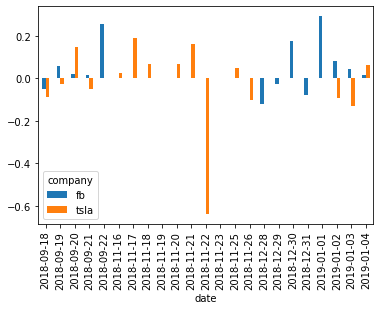

In [59]:
mean_c.plot.bar()

In [61]:
num_news_before = scored_news['headlines'].count()

In [60]:
scored_news

,company,date,time,headlines,compound,neg,neu,pos
0,fb,2019-01-04,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ...",0.4767,0.000,0.631,0.369
1,fb,2019-01-04,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...,0.0000,0.000,1.000,0.000
2,fb,2019-01-04,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...,0.0000,0.000,1.000,0.000
3,fb,2019-01-04,04:53PM,3 Tech Trends to Watch in 2019,0.0000,0.000,1.000,0.000
4,fb,2019-01-04,04:30PM,Will Denver's tech growth continue in 2019?,0.3818,0.000,0.698,0.302
5,fb,2019-01-04,02:46PM,Facebook to Prioritize Video in 2019,0.0000,0.000,1.000,0.000
6,fb,2019-01-04,01:52PM,ScotteVest CEO: How a Facebook Passion Project...,0.4588,0.000,0.750,0.250
7,fb,2019-01-04,01:47PM,"Millennials Load Up on Battered Apple, Faceboo...",0.0000,0.000,1.000,0.000
8,fb,2019-01-04,01:00PM,FAANGs See a Weak Start to 2019: More Pain Ahe...,-0.7574,0.419,0.581,0.000
9,fb,2019-01-04,12:18PM,U[PDATE: Netflix shares soar 9% as Goldman add...,0.2960,0.000,0.845,0.155


In [62]:
num_news_before

500

In [65]:
scored_news_clean = scored_news.drop_duplicates(subset=['company', 'headlines'])

In [66]:
scored_news_clean.count()

company      476
date         476
time         476
headlines    476
compound     476
neg          476
neu          476
pos          476
dtype: int64

In [67]:
scored_news_clean

,company,date,time,headlines,compound,neg,neu,pos
0,fb,2019-01-04,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ...",0.4767,0.000,0.631,0.369
1,fb,2019-01-04,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...,0.0000,0.000,1.000,0.000
2,fb,2019-01-04,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...,0.0000,0.000,1.000,0.000
3,fb,2019-01-04,04:53PM,3 Tech Trends to Watch in 2019,0.0000,0.000,1.000,0.000
4,fb,2019-01-04,04:30PM,Will Denver's tech growth continue in 2019?,0.3818,0.000,0.698,0.302
5,fb,2019-01-04,02:46PM,Facebook to Prioritize Video in 2019,0.0000,0.000,1.000,0.000
6,fb,2019-01-04,01:52PM,ScotteVest CEO: How a Facebook Passion Project...,0.4588,0.000,0.750,0.250
7,fb,2019-01-04,01:47PM,"Millennials Load Up on Battered Apple, Faceboo...",0.0000,0.000,1.000,0.000
8,fb,2019-01-04,01:00PM,FAANGs See a Weak Start to 2019: More Pain Ahe...,-0.7574,0.419,0.581,0.000
9,fb,2019-01-04,12:18PM,U[PDATE: Netflix shares soar 9% as Goldman add...,0.2960,0.000,0.845,0.155


In [68]:
single_day = scored_news_clean.set_index(['company', 'date'])

In [70]:
single_day = single_day.loc['fb']

In [71]:
single_day

,time,headlines,compound,neg,neu,pos
date,,,,,,
2019-01-04,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ...",0.4767,0.000,0.631,0.369
2019-01-04,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...,0.0000,0.000,1.000,0.000
2019-01-04,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...,0.0000,0.000,1.000,0.000
2019-01-04,04:53PM,3 Tech Trends to Watch in 2019,0.0000,0.000,1.000,0.000
2019-01-04,04:30PM,Will Denver's tech growth continue in 2019?,0.3818,0.000,0.698,0.302
2019-01-04,02:46PM,Facebook to Prioritize Video in 2019,0.0000,0.000,1.000,0.000
2019-01-04,01:52PM,ScotteVest CEO: How a Facebook Passion Project...,0.4588,0.000,0.750,0.250
2019-01-04,01:47PM,"Millennials Load Up on Battered Apple, Faceboo...",0.0000,0.000,1.000,0.000
2019-01-04,01:00PM,FAANGs See a Weak Start to 2019: More Pain Ahe...,-0.7574,0.419,0.581,0.000


In [72]:
single_day = single_day.loc['2019-01-03']

In [73]:
single_day

,time,headlines,compound,neg,neu,pos
date,,,,,,
2019-01-03,10:59PM,[$$] Facebook Begins New Year in Fixer-Upper Mode,0.0000,0.000,1.000,0.000
2019-01-03,05:45PM,Investors Are Focused Too Closely on Facebook ...,0.5859,0.000,0.652,0.348
2019-01-03,05:24PM,Facebook (FB) Reportedly Testing Dark Mode on ...,0.0000,0.000,1.000,0.000
2019-01-03,04:10PM,"Google Stock Upgraded, Viewed As 'Most Defensi...",0.1010,0.000,0.878,0.122
2019-01-03,03:26PM,Is Facebook Stock the Best FANG Stock to Buy?,0.6369,0.000,0.656,0.344
2019-01-03,03:14PM,Zuckerberg Paused His Selling of Facebook Shar...,0.6249,0.000,0.662,0.338
2019-01-03,01:36PM,What's Next For Apple (AAPL) After It Slashed ...,-0.2263,0.147,0.853,0.000
2019-01-03,01:31PM,Take the Money And Run From Twilio Stock,0.0000,0.000,1.000,0.000
2019-01-03,12:25PM,3 Great Reasons You Should Be Bullish on Twili...,0.6249,0.000,0.661,0.339


In [74]:
single_day['time'] = pd.to_datetime(single_day['time'])
single_day['time'] = single_day.time.dt.time

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:
single_day

,time,headlines,compound,neg,neu,pos
date,,,,,,
2019-01-03,22:59:00,[$$] Facebook Begins New Year in Fixer-Upper Mode,0.0000,0.000,1.000,0.000
2019-01-03,17:45:00,Investors Are Focused Too Closely on Facebook ...,0.5859,0.000,0.652,0.348
2019-01-03,17:24:00,Facebook (FB) Reportedly Testing Dark Mode on ...,0.0000,0.000,1.000,0.000
2019-01-03,16:10:00,"Google Stock Upgraded, Viewed As 'Most Defensi...",0.1010,0.000,0.878,0.122
2019-01-03,15:26:00,Is Facebook Stock the Best FANG Stock to Buy?,0.6369,0.000,0.656,0.344
2019-01-03,15:14:00,Zuckerberg Paused His Selling of Facebook Shar...,0.6249,0.000,0.662,0.338
2019-01-03,13:36:00,What's Next For Apple (AAPL) After It Slashed ...,-0.2263,0.147,0.853,0.000
2019-01-03,13:31:00,Take the Money And Run From Twilio Stock,0.0000,0.000,1.000,0.000
2019-01-03,12:25:00,3 Great Reasons You Should Be Bullish on Twili...,0.6249,0.000,0.661,0.339


In [76]:
single_day = single_day.set_index('time')

In [77]:
single_day

,headlines,compound,neg,neu,pos
time,,,,,
22:59:00,[$$] Facebook Begins New Year in Fixer-Upper Mode,0.0000,0.000,1.000,0.000
17:45:00,Investors Are Focused Too Closely on Facebook ...,0.5859,0.000,0.652,0.348
17:24:00,Facebook (FB) Reportedly Testing Dark Mode on ...,0.0000,0.000,1.000,0.000
16:10:00,"Google Stock Upgraded, Viewed As 'Most Defensi...",0.1010,0.000,0.878,0.122
15:26:00,Is Facebook Stock the Best FANG Stock to Buy?,0.6369,0.000,0.656,0.344
15:14:00,Zuckerberg Paused His Selling of Facebook Shar...,0.6249,0.000,0.662,0.338
13:36:00,What's Next For Apple (AAPL) After It Slashed ...,-0.2263,0.147,0.853,0.000
13:31:00,Take the Money And Run From Twilio Stock,0.0000,0.000,1.000,0.000
12:25:00,3 Great Reasons You Should Be Bullish on Twili...,0.6249,0.000,0.661,0.339


In [78]:
single_day = single_day.sort_index(ascending = True)

In [79]:
single_day

,headlines,compound,neg,neu,pos
time,,,,,
06:00:00,Why Internet Censorship Doesnt Work and Never ...,0.0000,0.000,1.000,0.000
08:04:00,"3 Big Stock Charts for Thursday: Medtronic, Fa...",0.0000,0.000,1.000,0.000
09:07:00,"The Zacks Analyst Blog Highlights: Facebook, W...",0.2500,0.000,0.846,0.154
09:12:00,Why The FAANGs Are Crucial To A 2019 Market Rally,0.0000,0.000,1.000,0.000
09:34:00,Apple warning stoking fears of slowdown in Chi...,-0.6369,0.426,0.574,0.000
09:48:00,"Stock Market News For Jan 3, 2019",0.0000,0.000,1.000,0.000
09:58:00,Facebook Falls 3%,-0.9993,0.981,0.019,0.000
10:08:00,Mark Zuckerberg Halts Stock Sales as Facebook ...,0.2960,0.000,0.784,0.216
10:21:00,Facebook Under Fire for Collecting Data From A...,-0.3400,0.231,0.769,0.000


In [83]:
Title = "P, N and N sentiment for FB on 03-01-2019"
colors = ['red', 'orange', 'green']
single_day

,headlines,compound,neg,neu,pos
time,,,,,
06:00:00,Why Internet Censorship Doesnt Work and Never ...,0.0000,0.000,1.000,0.000
08:04:00,"3 Big Stock Charts for Thursday: Medtronic, Fa...",0.0000,0.000,1.000,0.000
09:07:00,"The Zacks Analyst Blog Highlights: Facebook, W...",0.2500,0.000,0.846,0.154
09:12:00,Why The FAANGs Are Crucial To A 2019 Market Rally,0.0000,0.000,1.000,0.000
09:34:00,Apple warning stoking fears of slowdown in Chi...,-0.6369,0.426,0.574,0.000
09:48:00,"Stock Market News For Jan 3, 2019",0.0000,0.000,1.000,0.000
09:58:00,Facebook Falls 3%,-0.9993,0.981,0.019,0.000
10:08:00,Mark Zuckerberg Halts Stock Sales as Facebook ...,0.2960,0.000,0.784,0.216
10:21:00,Facebook Under Fire for Collecting Data From A...,-0.3400,0.231,0.769,0.000


In [84]:
plot_day = single_day.drop(["headlines",'compound'], axis = 1)
plot_day

,neg,neu,pos
time,,,
06:00:00,0.000,1.000,0.000
08:04:00,0.000,1.000,0.000
09:07:00,0.000,0.846,0.154
09:12:00,0.000,1.000,0.000
09:34:00,0.426,0.574,0.000
09:48:00,0.000,1.000,0.000
09:58:00,0.981,0.019,0.000
10:08:00,0.000,0.784,0.216
10:21:00,0.231,0.769,0.000


In [85]:
plot_day.columns = ['negative', 'positive', 'neutral']

In [86]:
plot_day

,negative,positive,neutral
time,,,
06:00:00,0.000,1.000,0.000
08:04:00,0.000,1.000,0.000
09:07:00,0.000,0.846,0.154
09:12:00,0.000,1.000,0.000
09:34:00,0.426,0.574,0.000
09:48:00,0.000,1.000,0.000
09:58:00,0.981,0.019,0.000
10:08:00,0.000,0.784,0.216
10:21:00,0.231,0.769,0.000


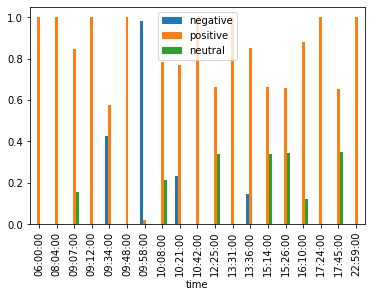

In [88]:
plot_day.plot.bar()